In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [3]:
def normalize(data, lo, hi):
    return cv2.normalize(data, None, lo, hi, norm_type=cv2.NORM_MINMAX)

In [4]:
def imshow(image):
    image = normalize(image, 0, 255)
    plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))

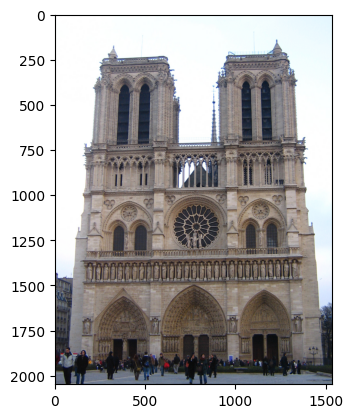

In [5]:
img_left = cv2.imread('1a_notredame.jpg')
imshow(img_left)

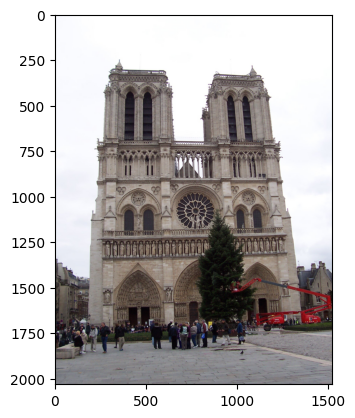

In [6]:
img_right = cv2.imread('1b_notredame.jpg')
imshow(img_right)

In [7]:
def sift_detect(image, n_keypoints):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create(n_keypoints)
    kp, descriptor = sift.detectAndCompute(gray, None)
    points = np.array([k.pt for k in kp])
    return kp, points, descriptor

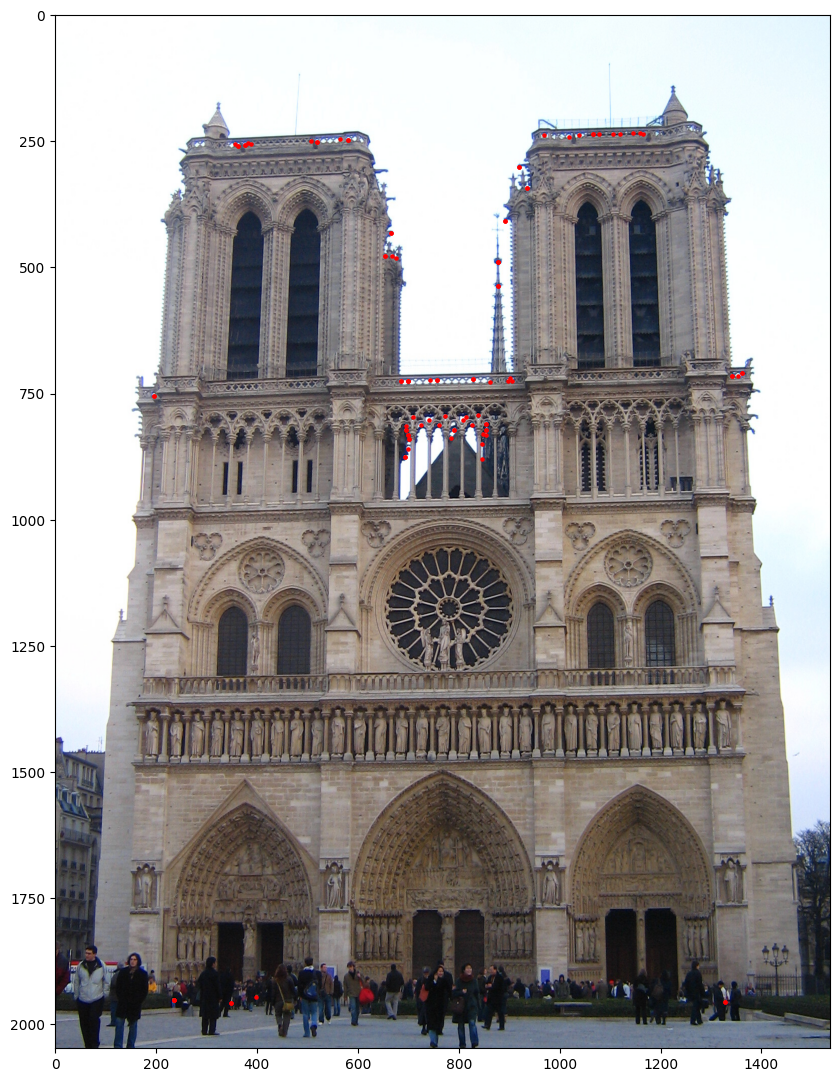

In [8]:
left_kp, left_point, left_desc = sift_detect(img_left, 100)
plt.figure(figsize=(10, 15))
imshow(img_left)
plt.scatter(left_point[:, 0], left_point[:, 1], c='r', s=5)

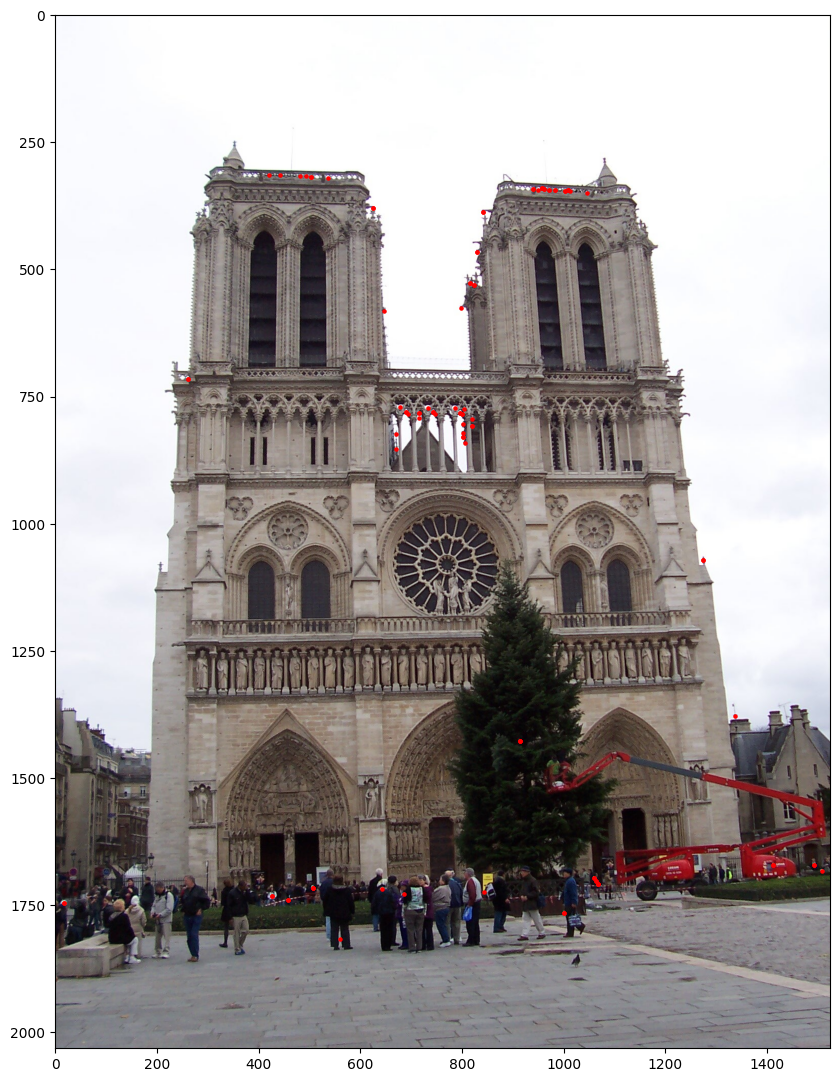

In [9]:
right_kp, right_point, right_desc = sift_detect(img_right, 100)
plt.figure(figsize=(10, 15))
imshow(img_right)
plt.scatter(right_point[:, 0], right_point[:, 1], c='r', s=5)

In [10]:
idx = []
for q, key in enumerate(left_desc):
    distance = np.linalg.norm(key - right_desc, axis=-1)
    t = np.argmin(distance)
    if distance[t] < 400:
        idx.append([cv2.DMatch(q, t, distance[t])])
    print(distance[t], t)

384.50357 78
224.63304 12
225.87164 36
326.9847 89
328.49048 47
191.78635 14
369.3088 32
376.578 32
316.04114 47
181.57092 68
384.25772 24
299.65982 43
359.20468 25
348.15515 65
271.00183 49
357.68842 81
331.66852 66
449.42184 60
278.8763 63
256.05664 17
342.66455 83
369.62143 64
322.2794 90
366.42188 72
325.1538 96
352.47552 82
315.84805 48
244.33174 11
281.19388 64
345.5257 82
300.94186 32
327.07034 4
258.33893 5
360.54126 77
374.67587 81
300.60773 28
333.87723 39
338.25287 77
286.91113 14
342.84982 83
337.31885 59
344.4474 96
240.66574 27
316.91956 63
266.12216 75
281.28455 96
271.97977 30
336.05505 93
281.63452 14
264.25745 24
345.14056 53
292.72342 97
321.94254 65
295.02374 55
397.0806 27
321.70795 49
256.33768 91
380.27228 31
341.94296 22
270.3405 48
327.637 99
367.84372 20
300.73743 20
337.90088 81
340.7169 0
294.13092 62
329.533 77
383.90234 65
271.1789 35
305.26056 35
294.84064 20
306.6317 71
354.4545 58
279.00717 90
259.03668 68
235.2913 67
382.9099 20
218.45366 76
290.1379 1

In [11]:
idx = np.array(idx)
idx

array([[< cv2.DMatch 000001823007DE30>],
       [< cv2.DMatch 000001823007DE90>],
       [< cv2.DMatch 000001823007D650>],
       [< cv2.DMatch 000001823007D7B0>],
       [< cv2.DMatch 000001823007DC50>],
       [< cv2.DMatch 000001823007DF90>],
       [< cv2.DMatch 000001823007DF10>],
       [< cv2.DMatch 000001823007D670>],
       [< cv2.DMatch 00000182300AA570>],
       [< cv2.DMatch 00000182300AA890>],
       [< cv2.DMatch 00000182300AA7B0>],
       [< cv2.DMatch 00000182300AA0B0>],
       [< cv2.DMatch 00000182300AA7D0>],
       [< cv2.DMatch 00000182300AA770>],
       [< cv2.DMatch 00000182300AA5D0>],
       [< cv2.DMatch 00000182300AA150>],
       [< cv2.DMatch 00000182300AA090>],
       [< cv2.DMatch 00000182300AA070>],
       [< cv2.DMatch 00000182300AA910>],
       [< cv2.DMatch 00000182300AA8B0>],
       [< cv2.DMatch 00000182300AA1B0>],
       [< cv2.DMatch 00000182300AA5F0>],
       [< cv2.DMatch 00000182300AA810>],
       [< cv2.DMatch 00000182300AA850>],
       [< cv2.DM

In [12]:
img = cv2.drawMatchesKnn(img_left, left_kp, img_right, right_kp, idx, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

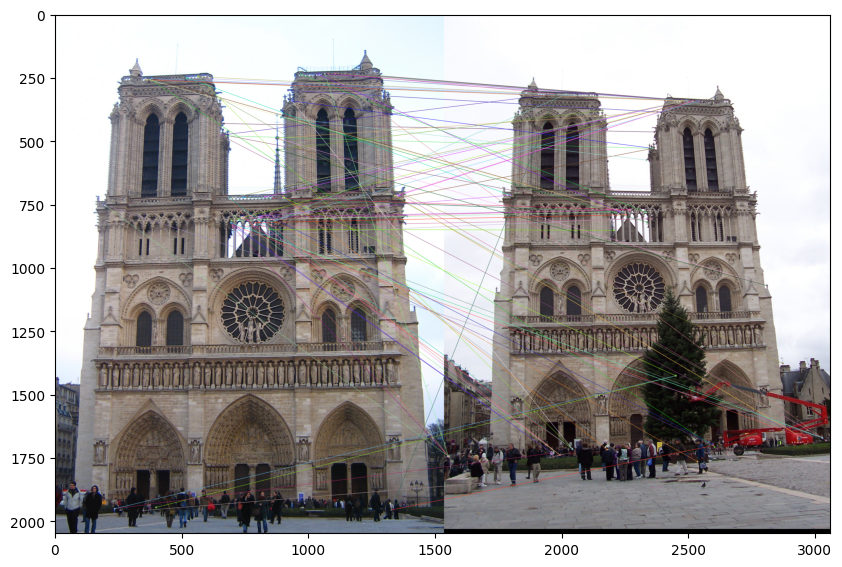

In [13]:
plt.figure(figsize=(10, 15))
imshow(img)